In [41]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Import Data
loan = pd.read_csv('../data/prep_loan.csv', low_memory=False)
loan.head()

,purpose,verification_status,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,total_acc,pub_rec,revol_util,revol_bal,addr_state,term,loan_condition,loan_condition_num
0,credit_card,Verified,5000.0,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,1.0,3.0,9.0,0.0,83.7,13648.0,AZ,36 months,Good,0
1,car,Source Verified,2500.0,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,5.0,3.0,4.0,0.0,9.4,1687.0,GA,60 months,Bad,1
2,small_business,Not Verified,2400.0,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2.0,2.0,10.0,0.0,98.5,2956.0,IL,36 months,Good,0
3,other,Source Verified,10000.0,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,1.0,10.0,37.0,0.0,21.0,5598.0,CA,36 months,Good,0
4,wedding,Source Verified,5000.0,7.90,156.46,A,A4,3 years,RENT,36000.0,...,3.0,9.0,12.0,0.0,28.3,7963.0,AZ,36 months,Good,0


In [43]:
loan.isnull().any()

purpose                False
verification_status    False
loan_amnt              False
int_rate               False
installment            False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
dti                    False
inq_last_6mths         False
open_acc               False
total_acc              False
pub_rec                False
revol_util             False
revol_bal              False
addr_state             False
term                   False
loan_condition         False
loan_condition_num     False
dtype: bool

In [44]:
loan['home_ownership'].value_counts()

RENT        19438
MORTGAGE    17891
OWN          3102
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

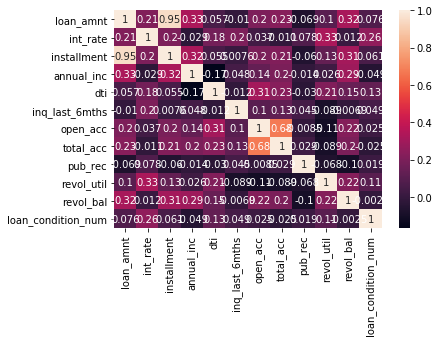

In [7]:
sns.heatmap(loan.corr(), annot=True)

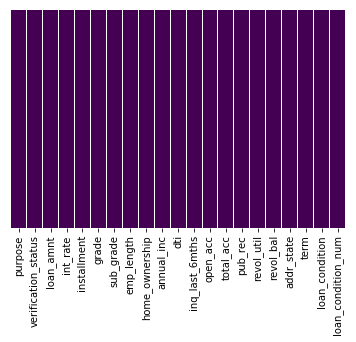

In [8]:
sns.heatmap(loan.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
loan.tail()

,purpose,verification_status,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,total_acc,pub_rec,revol_util,revol_bal,addr_state,term,loan_condition,loan_condition_num
285595,medical,Verified,4200.0,15.99,147.64,D,D2,10+ years,MORTGAGE,48000.0,...,0.0,13.0,45.0,0.0,63.4,12943.0,CO,36 months,Bad,1
285596,debt_consolidation,Not Verified,10775.0,6.03,327.95,A,A1,< 1 year,RENT,54000.0,...,0.0,9.0,21.0,0.0,25.8,10776.0,FL,36 months,Good,0
285597,debt_consolidation,Source Verified,6225.0,16.49,220.37,D,D3,2 years,RENT,27000.0,...,1.0,3.0,4.0,0.0,97.6,1756.0,FL,36 months,Good,0
285598,car,Verified,4000.0,8.67,126.59,B,B1,10+ years,MORTGAGE,50000.0,...,0.0,11.0,30.0,1.0,5.6,1700.0,CA,36 months,Good,0
285599,debt_consolidation,Verified,10850.0,19.24,399.04,E,E2,10+ years,OWN,32000.0,...,1.0,9.0,20.0,0.0,41.6,6987.0,OH,36 months,Bad,1


In [45]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 21 columns):
purpose                40575 non-null object
verification_status    40575 non-null object
loan_amnt              40575 non-null float64
int_rate               40575 non-null float64
installment            40575 non-null float64
grade                  40575 non-null object
sub_grade              40575 non-null object
emp_length             40575 non-null object
home_ownership         40575 non-null object
annual_inc             40575 non-null float64
dti                    40575 non-null float64
inq_last_6mths         40575 non-null float64
open_acc               40575 non-null float64
total_acc              40575 non-null float64
pub_rec                40575 non-null float64
revol_util             40575 non-null float64
revol_bal              40575 non-null float64
addr_state             40575 non-null object
term                   40575 non-null object
loan_condition         40

In [46]:
loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,total_acc,pub_rec,revol_util,revol_bal,loan_condition_num
count,40575.000000,40575.000000,40575.000000,4.057500e+04,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,4.057500e+04,40575.000000
mean,10842.850277,12.038870,320.053873,6.893018e+04,13.314901,1.094985,9.325323,22.082465,0.058534,48.966125,1.423649e+04,0.158620
std,7249.117531,3.669872,208.608127,6.483512e+04,6.723454,1.545134,4.501600,11.624536,0.246331,28.379564,2.226805e+04,0.365326
min,500.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5000.000000,9.320000,164.265000,4.000000e+04,8.130000,0.000000,6.000000,13.000000,0.000000,25.500000,3.573000e+03,0.000000
50%,9500.000000,11.860000,274.450000,5.820000e+04,13.410000,1.000000,9.000000,20.000000,0.000000,49.400000,8.702000e+03,0.000000
75%,15000.000000,14.590000,422.330000,8.200000e+04,18.630000,2.000000,12.000000,29.000000,0.000000,72.500000,1.706600e+04,0.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,33.000000,47.000000,90.000000,5.000000,119.000000,1.207359e+06,1.000000


In [47]:
loan.describe(include=['O'])

,purpose,verification_status,grade,sub_grade,emp_length,home_ownership,addr_state,term,loan_condition
count,40575,40575,40575,40575,40575,40575,40575,40575,40575
unique,14,3,7,35,11,5,50,2,2
top,debt_consolidation,Not Verified,B,A4,10+ years,RENT,CA,36 months,Good
freq,18811,18321,11811,2881,9800,19438,7154,31534,34139


In [15]:
loan[['grade', 'loan_condition_num']].groupby(['grade'], as_index=False).mean().sort_values(by='loan_condition_num', ascending=False)

,grade,loan_condition_num
6,G,0.492624
5,F,0.463466
4,E,0.412155
3,D,0.333467
2,C,0.255125
1,B,0.162512
0,A,0.081618


In [16]:
loan[['emp_length', 'loan_condition_num']].groupby(['emp_length'], as_index=False).mean().sort_values(by='loan_condition_num', ascending=False)

,emp_length,loan_condition_num
9,9 years,0.246693
10,< 1 year,0.242463
8,8 years,0.242122
7,7 years,0.239933
1,10+ years,0.239329
6,6 years,0.235294
0,1 year,0.234172
3,3 years,0.233411
2,2 years,0.227432
5,5 years,0.226683


In [17]:
loan[['verification_status', 'loan_condition_num']].groupby(['verification_status'], as_index=False).mean().sort_values(by='loan_condition_num', ascending=False)

,verification_status,loan_condition_num
2,Verified,0.263389
1,Source Verified,0.262518
0,Not Verified,0.182423


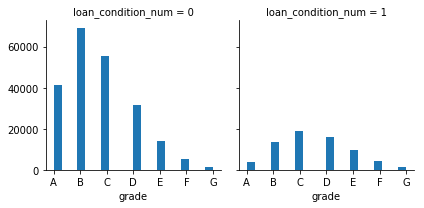

In [19]:
g = sns.FacetGrid(loan, col='loan_condition_num')
g.map(plt.hist, 'grade', bins=20)

In [21]:
loan[['home_ownership', 'loan_condition_num']].groupby(['home_ownership'], as_index=False).mean().sort_values(by='loan_condition_num', ascending=False)

,home_ownership,loan_condition_num
5,RENT,0.261265
4,OWN,0.247473
1,MORTGAGE,0.212450
3,OTHER,0.212291
2,NONE,0.166667
0,ANY,0.000000


In [23]:
loan[['purpose', 'loan_condition_num']].groupby(['purpose'], as_index=False).mean().sort_values(by='loan_condition_num', ascending=False)

,purpose,loan_condition_num
11,small_business,0.332462
8,moving,0.264719
9,other,0.255603
7,medical,0.250000
2,debt_consolidation,0.247702
10,renewable_energy,0.245734
5,house,0.225040
12,vacation,0.224581
4,home_improvement,0.210873
1,credit_card,0.208618


In [25]:
loan[['addr_state', 'loan_condition_num']].groupby(['addr_state'], as_index=False).mean().sort_values(by='loan_condition_num', ascending=False)

,addr_state,loan_condition_num
25,MS,0.340102
42,TN,0.313626
15,IN,0.294785
1,AL,0.274007
33,NV,0.272347
36,OK,0.269777
29,NE,0.266667
9,FL,0.258226
34,NY,0.257577
32,NM,0.256541


In [51]:
categories = ['purpose', 'verification_status', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'addr_state', 'term']
raw_model_data = pd.get_dummies(loan.copy(), columns=categories,drop_first=True)

In [62]:
from sklearn.model_selection import train_test_split
y = raw_model_data['loan_condition_num']
X = raw_model_data.drop(columns=['loan_condition', 'loan_condition_num'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
predictions = logreg.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))


             precision    recall  f1-score   support

          0       0.85      1.00      0.92     10325
          1       0.21      0.00      0.01      1848

avg / total       0.75      0.85      0.78     12173



In [61]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
predictions = svc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))


             precision    recall  f1-score   support

          0       0.95      1.00      0.97     10235
          1       1.00      0.71      0.83      1938

avg / total       0.96      0.95      0.95     12173

